In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 加载数据
df = pd.read_csv('genres_v2.csv')

# 删除没有歌曲名称和URI的行，并删除重复行
df = df.dropna(subset=['song_name', 'uri'])
df = df.drop_duplicates(subset=['song_name', 'uri'])

# 选择相关列
cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'uri', 'genre', 'song_name']
filtered_df = df[cols]

# 标准化数值列
num_cols = [i for i in filtered_df.columns if filtered_df[i].dtype != 'object']
scaler = StandardScaler()
filtered_df.loc[:, num_cols] = scaler.fit_transform(filtered_df[num_cols])


C:\Users\jiawen\AppData\Local\Temp\ipykernel_51300\1503820674.py:10: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('genres_v2.csv')


In [12]:
# 执行PCA降维
n_components = 3
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(filtered_df[num_cols])
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

# 应用GMM聚类
n_clusters = 4
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
pca_df['cluster'] = gmm.fit_predict(pca_result)

# 将 genre 列合并回 pca_df
pca_df = pd.concat([pca_df, filtered_df[['genre', 'song_name']].reset_index(drop=True)], axis=1)


In [13]:
# 给每个簇添加情绪标签
pca_df['mood'] = np.where(pca_df['cluster'] == 0, 'Sad', np.nan)
pca_df['mood'] = np.where(pca_df['cluster'] == 1, 'Calm', pca_df['mood'])
pca_df['mood'] = np.where(pca_df['cluster'] == 2, 'Angry', pca_df['mood'])
pca_df['mood'] = np.where(pca_df['cluster'] == 3, 'Happy', pca_df['mood'])

print(pca_df.head())


        PC1       PC2       PC3  cluster      genre  \
0 -0.747293 -1.238638 -1.230113        3  Dark Trap   
1  1.567894  0.072922 -0.325521        1  Dark Trap   
2 -1.445841  0.742496 -0.742154        2  Dark Trap   
3 -0.776127  1.317081 -1.640752        3  Dark Trap   
4 -0.132837 -1.461254 -1.094377        3  Dark Trap   

                                       song_name   mood  
0                            Mercury: Retrograde  Happy  
1                                      Pathology   Calm  
2                                       Symbiote  Angry  
3  ProductOfDrugs (Prod. The Virus and Antidote)  Happy  
4                                          Venom  Happy  


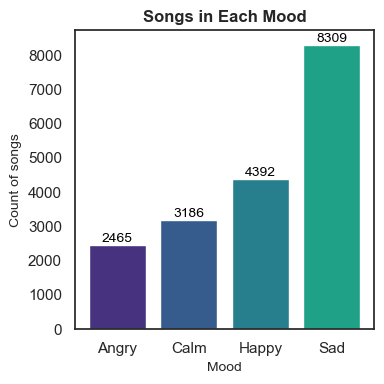

In [14]:
# 设置Seaborn样式
sns.set(style="white")

# 获取每个情绪标签的歌曲数量
mood_counts = pca_df['mood'].value_counts().sort_values()

# 设置颜色调色板
colors = sns.color_palette('viridis')

# 绘制柱状图
plt.figure(figsize=(4, 4))
bars = plt.bar(mood_counts.index, mood_counts.values, color=colors)

plt.title('Songs in Each Mood', fontsize=12, fontweight='bold')
plt.xlabel('Mood', fontsize=10)
plt.ylabel('Count of songs', fontsize=10)

# 显示每个柱的数量
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(mood_counts.index)
plt.tight_layout()
plt.show()


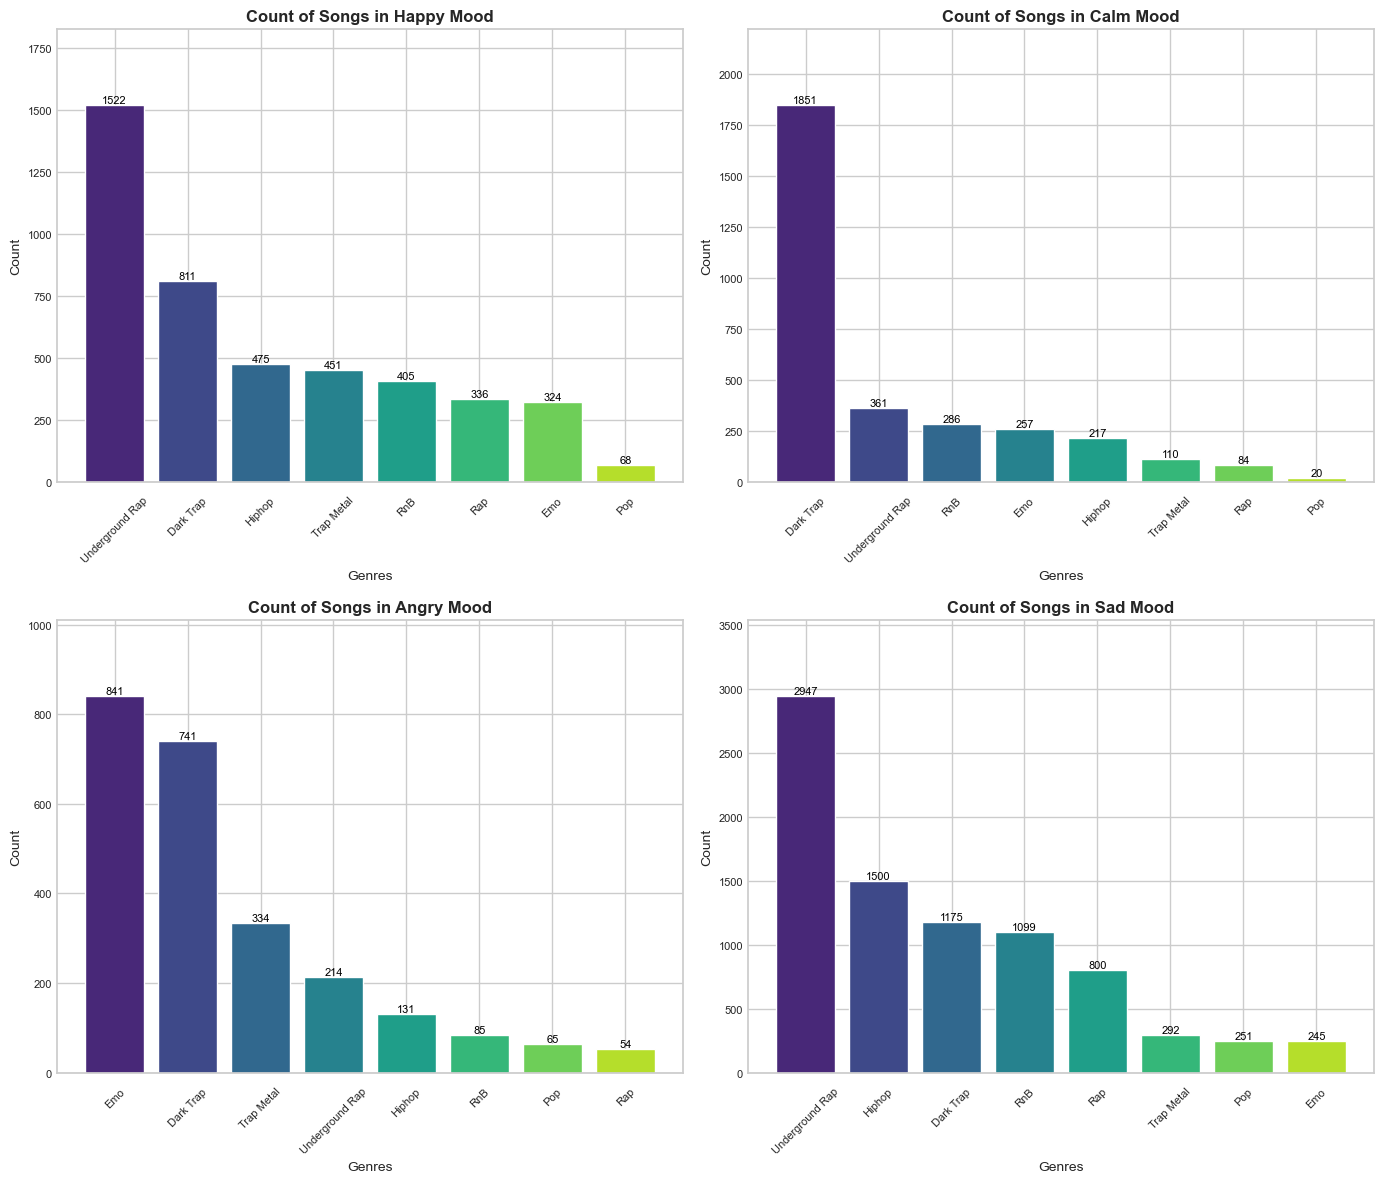

In [15]:
# 设置Seaborn样式
sns.set(style="whitegrid")

# 获取唯一的情绪标签和流派
unique_moods = pca_df['mood'].unique()
unique_genres = pca_df['genre'].unique()

# 设置颜色调色板
colors = sns.color_palette('viridis', len(unique_genres))

# 创建子图
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

for i, mood in enumerate(unique_moods):
    row = i // 2
    col = i % 2

    mood_data = pca_df[pca_df['mood'] == mood]
    genre_counts = mood_data['genre'].value_counts()

    # 绘制柱状图
    bars = axes[row, col].bar(genre_counts.index, genre_counts.values, color=colors)

    axes[row, col].set_title(f'Count of Songs in {mood} Mood', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Genres', fontsize=10)
    axes[row, col].set_ylabel('Count', fontsize=10)
    axes[row, col].tick_params(axis='x', rotation=45, labelsize=8)
    axes[row, col].tick_params(axis='y', labelsize=8)
    axes[row, col].tick_params(axis='y', which='both', length=0)
    axes[row, col].set_ylim(0, genre_counts.max() * 1.2)

    # 显示每个柱的数量
    for bar in bars:
        yval = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontsize=8, color='black')

# 调整布局
plt.tight_layout()
plt.show()


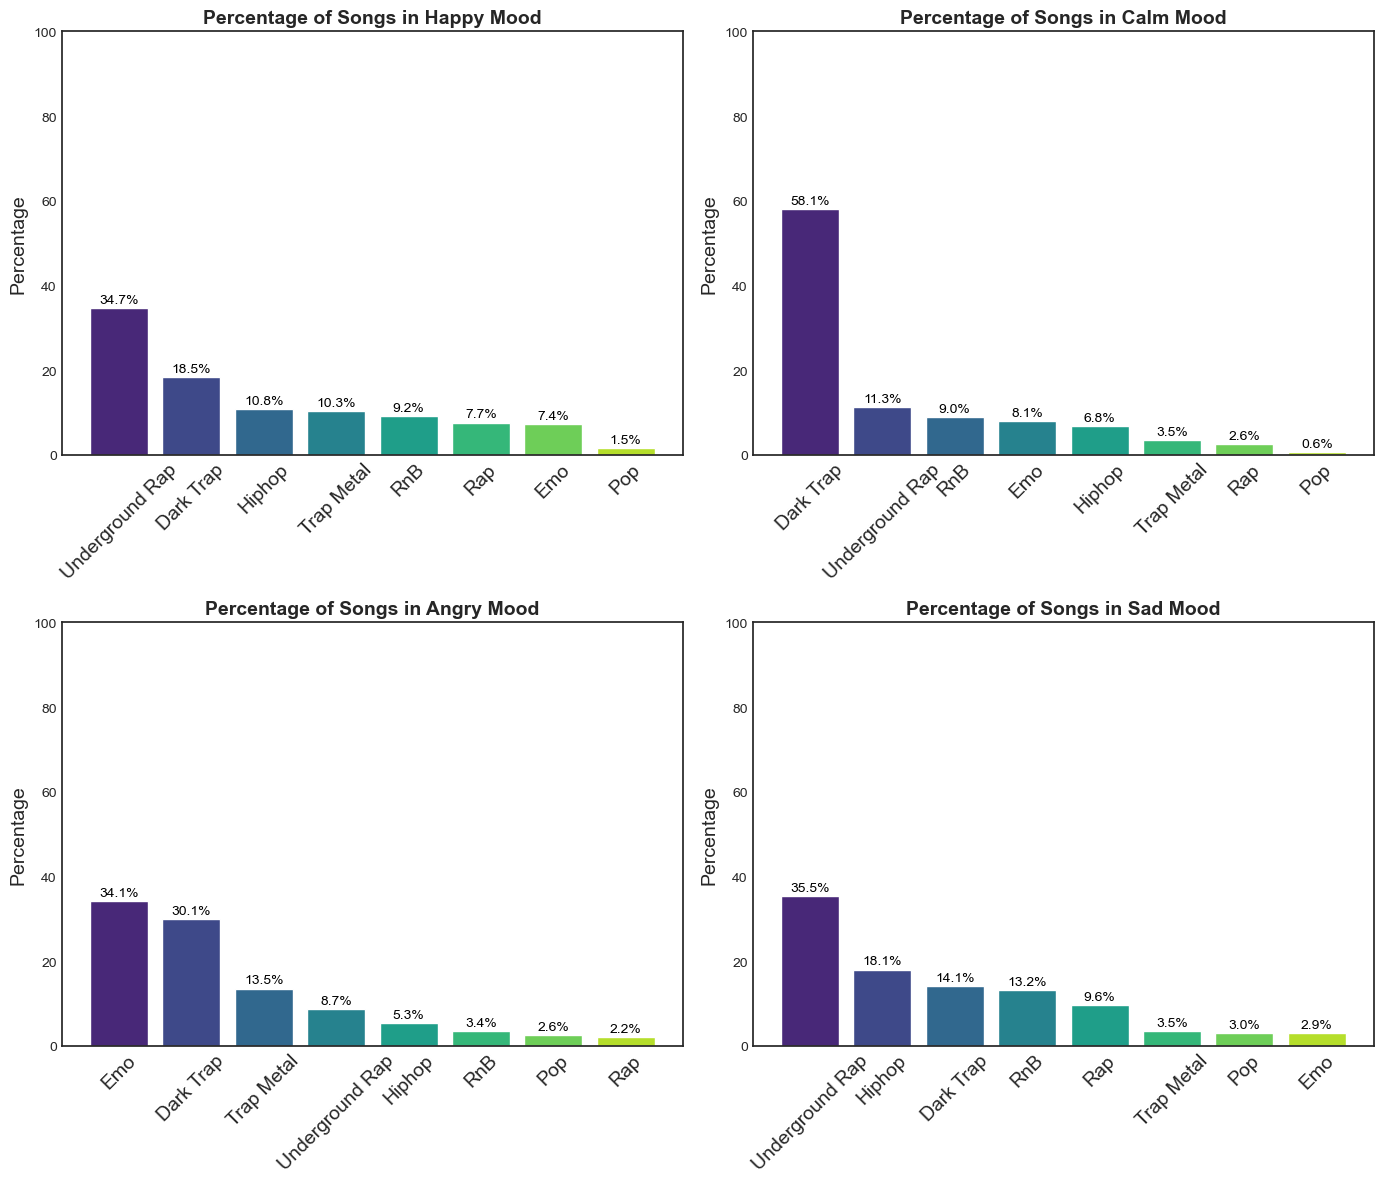

In [16]:
# 设置Seaborn样式
sns.set(style="white")

# 获取唯一的情绪标签和流派
unique_moods = pca_df['mood'].unique()
unique_genres = pca_df['genre'].unique()

# 设置颜色调色板
colors = sns.color_palette('viridis', len(unique_genres))

# 创建子图
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

for i, mood in enumerate(unique_moods):
    row = i // 2
    col = i % 2

    mood_data = pca_df[pca_df['mood'] == mood]
    genre_counts = mood_data['genre'].value_counts()

    # 绘制百分比柱状图
    bars = axes[row, col].bar(genre_counts.index, genre_counts.values / genre_counts.sum() * 100, color=colors)

    axes[row, col].set_title(f'Percentage of Songs in {mood} Mood', fontsize=14, fontweight='bold')
    axes[row, col].set_ylabel('Percentage', fontsize=14)
    axes[row, col].tick_params(axis='x', rotation=45, labelsize=14)
    axes[row, col].tick_params(axis='y', labelsize=10)
    axes[row, col].tick_params(axis='both', which='both', length=0)
    axes[row, col].set_ylim(0, 100)

    # 显示每个柱的百分比
    for bar in bars:
        yval = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

# 调整布局
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
import numpy as np

detected_mood = input("input（Sad, Calm, Angry, Happy）: ")
valid_moods = ['Sad', 'Calm', 'Angry', 'Happy']
if detected_mood not in valid_moods:
    print("not found please input：Sad or Calm or Angry or Happy")
else:
    filtered_by_mood = pca_df[pca_df['mood'] == detected_mood]
    if filtered_by_mood.empty:
        print(f"No songs found for {detected_mood} mood.")
    else:
        random_songs = filtered_by_mood.sample(5)['song_name']
        print("Random songs with", detected_mood, "emotion are: ")
        print(random_songs.to_list())


Random songs with Sad emotion are: 
['Nervous', 'Hands Own (feat. LilBeno, Drego & Nuk)', 'Thotiana (feat. Cardi B, YG) [Remix]', '99 Problems', 'SMARTPHXNE.']


In [25]:

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import time
import os

chrome_options = Options()
chrome_options.add_argument("--start-maximized")
chrome_options.add_argument("--disable-infobars")
chrome_options.add_argument("--disable-extensions")
chrome_driver_path = os.path.join('chromedriver.exe')

# 開Chrome
service = Service(chrome_driver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)

try:
    # 開yt
    driver.get('https://www.youtube.com')

    # 找分類裡的歌名
    search_box = driver.find_element(By.NAME, 'search_query')
    search_box.send_keys(random_songs.iloc[0])
    search_box.send_keys(Keys.RETURN)

    time.sleep(3)

    # 搜尋後的第一個影片
    first_result = driver.find_element(By.CSS_SELECTOR, 'a#video-title')
    first_result.click()

    # 音樂播30sec
    time.sleep(30)

finally:
    driver.quit()
